<a href="https://colab.research.google.com/github/aymash13/Aerofit/blob/main/Aerofit_business_case_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Aerofit

## Problem Statement
Aerofit, a leading brand in the fitness equipment industry, wants to identify the characteristics of the target audience for each type of treadmill (KP281, KP481, KP781). The aim is to understand differences across products with respect to customer characteristics and use this knowledge to recommend the most suitable treadmill to new customers.

## Objective
- Perform descriptive analytics to create a customer profile for each treadmill model.  
- Analyze the relationship between customer characteristics (age, income, gender, marital status, fitness, usage, miles) and treadmill type purchased.  
- Construct two-way contingency tables and compute marginal and conditional probabilities to evaluate purchase likelihoods.  
- Provide actionable insights and recommendations for better customer targeting and product positioning.  


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'

In [77]:
df = pd.read_csv(url)

In [78]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [79]:
df.shape

(180, 9)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [81]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Data cleaning

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [83]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


data does not contain null values

In [84]:
df.duplicated().sum()

np.int64(0)

data does not contain duplicates

In [85]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

### Outliers detection

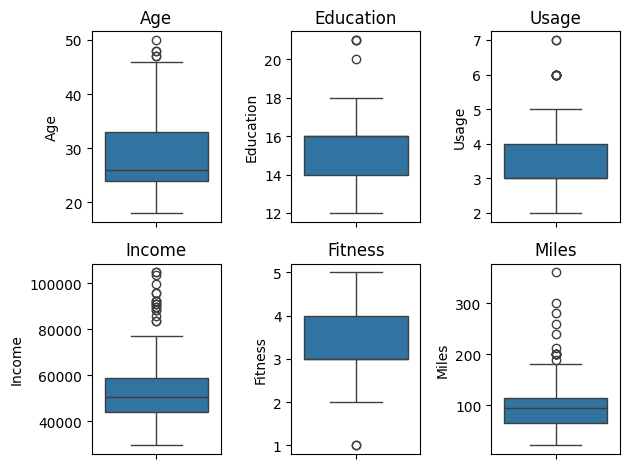

In [86]:
for i, col in enumerate(['Age','Education','Usage','Income','Fitness','Miles']):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Even though some values are coming out as outliers, I am keeping them because they might show real differences in customers. These are not mistakes, and removing them may hide useful information.

### Analysis

In [87]:
print(df['Product'].value_counts(normalize=True)*100)


Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64


In [88]:
pd.crosstab(df['Product'], df['Gender'], margins=True, normalize='all')*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


In [89]:
pd.crosstab(df['Product'], df['MaritalStatus'], margins=True, normalize='all')*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.666667,17.777778,44.444444
KP481,20.000000,13.333333,33.333333
KP781,12.777778,9.444444,22.222222
All,59.444444,40.555556,100.000000


#### univariate

/tmp/ipython-input-1064188536.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product', palette='Set2')


<Axes: xlabel='Product', ylabel='count'>

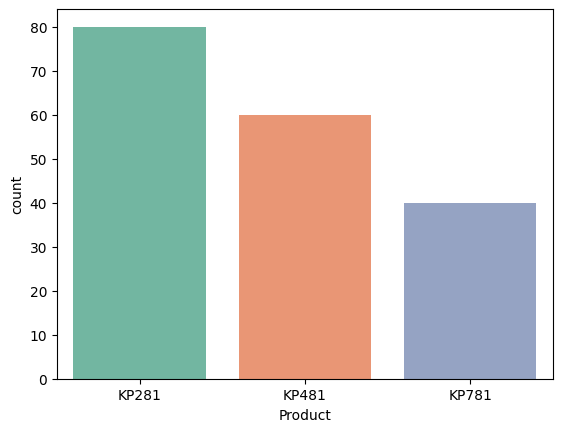

In [90]:
sns.countplot(data=df, x='Product', palette='Set2')

Insight: KP281 is the most popular product, followed by KP481, while KP781 has the least demand.

/tmp/ipython-input-1038385801.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


<Axes: xlabel='Gender', ylabel='count'>

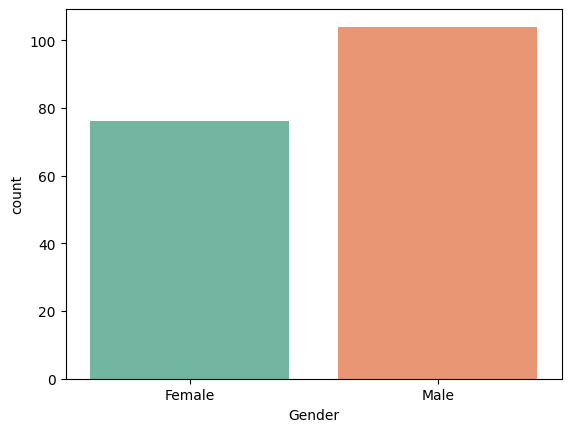

In [91]:
sns.countplot(data=df, x='Gender', palette='Set2')

Insight:Males purchase Aerofit products more than females

/tmp/ipython-input-3569226414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='MaritalStatus', palette='Set2')


<Axes: xlabel='MaritalStatus', ylabel='count'>

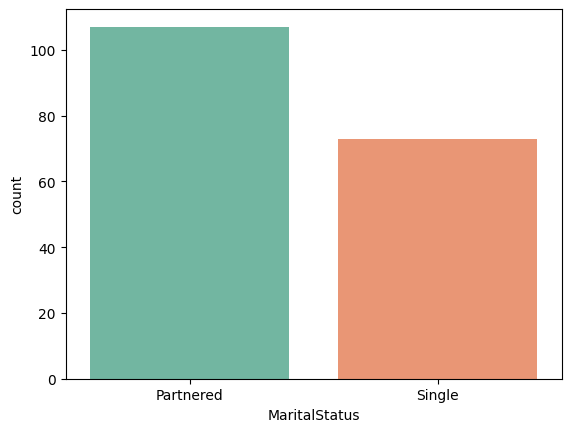

In [92]:
sns.countplot(data=df, x='MaritalStatus', palette='Set2')

Insight:Partnered customers dominate compared to single ones.

<Axes: xlabel='Age', ylabel='Count'>

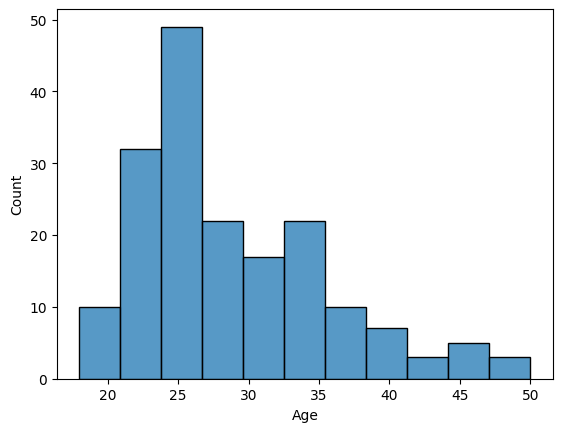

In [93]:
sns.histplot(data=df, x='Age')

Insight:Most customers are in their mid-20s, with numbers declining as age increases.

<Axes: xlabel='Income', ylabel='Count'>

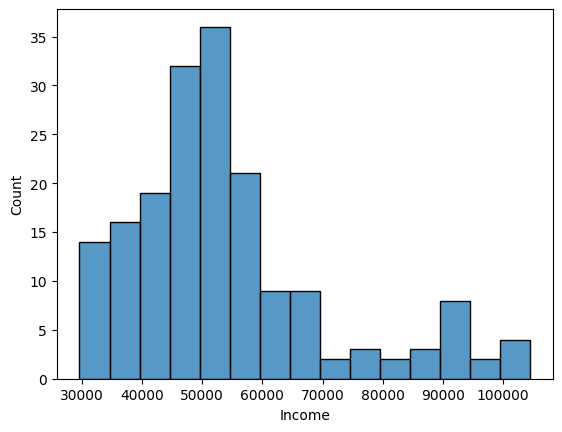

In [94]:
sns.histplot(x='Income',data=df)

Insight:A large proportion of customers fall in the $40K – $60K income range, indicating Aerofit’s strong appeal among middle-income groups.

<Axes: xlabel='Miles', ylabel='Count'>

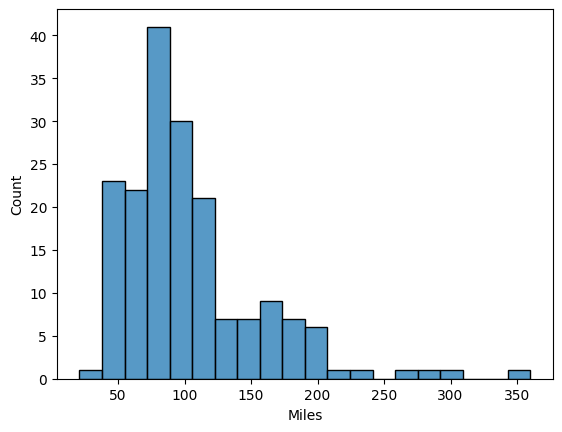

In [95]:
sns.histplot(x='Miles',data=df)

Insight:Customers on average expect to cover 80–120 miles per week, indicating that Aerofit users are consistent exercisers with a preference for endurance-focused workouts.

As some expect to cover > 150 miles,showing Aerofitness also has Athalete/professionals in their customer base

<Axes: xlabel='Usage', ylabel='Count'>

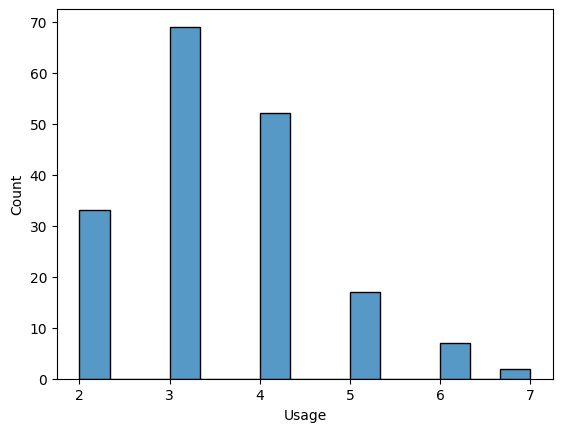

In [96]:
sns.histplot(data=df, x='Usage')

Insight: Most customers use the products 3–4 times, indicating moderate engagement in fitness activities. Only a small portion uses them 6–7 times, suggesting they are professionals or athletes.

<Axes: xlabel='Fitness', ylabel='Count'>

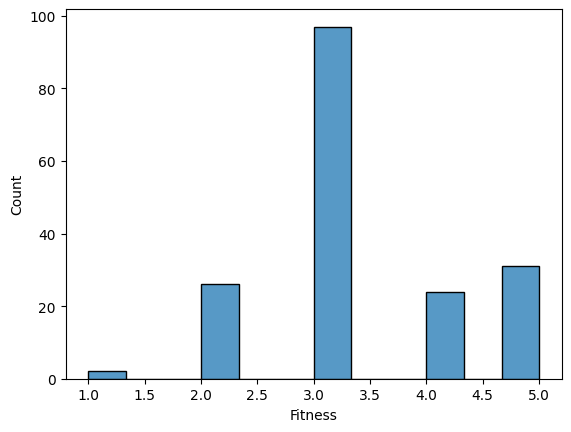

In [97]:
sns.histplot(x='Fitness',data=df)

Insight:Most Aerofit users cluster around a fitness score of 3.0, indicating the major audience is moderately fit individuals with an average health orientation rather than complete beginners or advanced athletes.

#### bivariate

<Axes: xlabel='Product', ylabel='Age'>

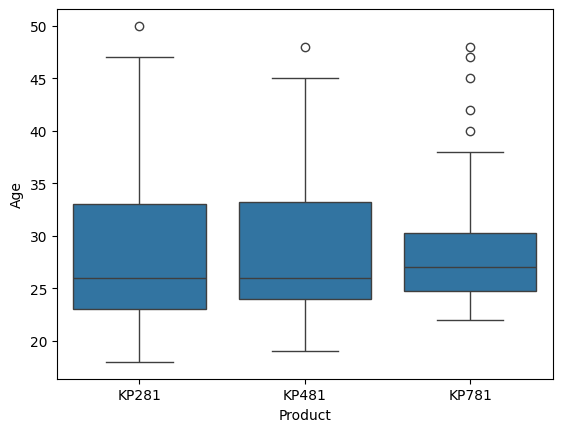

In [98]:
sns.boxplot(x='Product', y='Age', data=df)

KP281 & KP481 buyers - age around 25–27 years.

KP781 buyers - Slightly older.

Insight: Younger customers prefer entry & mid-level treadmills, while KP781 attracts slightly older and more serious users.

<Axes: xlabel='Product', ylabel='Income'>

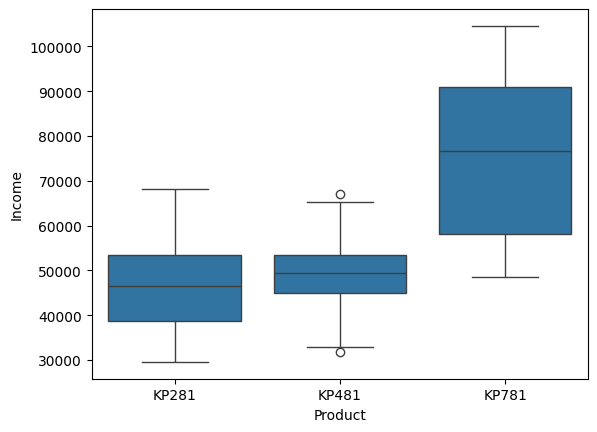

In [99]:
sns.boxplot(x='Product', y='Income', data=df)

KP281 - customers with income $40k,up to $55k.

KP481 - Similar income levels as KP281.

KP781 - Clear premium group, wiht income around $60k - >$90k.

Insight: KP781 is strongly income-driven, purchased by higher-income customers.

<Axes: xlabel='Product', ylabel='Miles'>

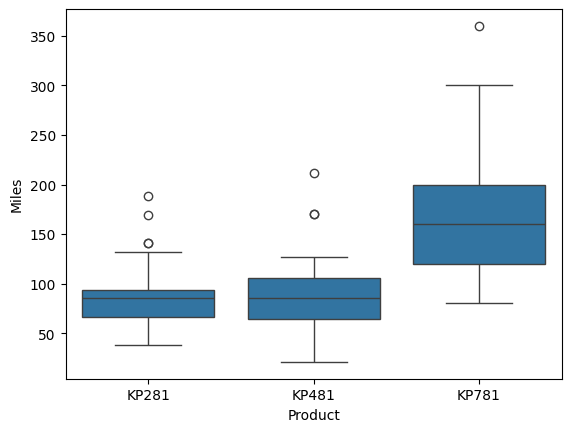

In [100]:
sns.boxplot(x='Product', y='Miles', data=df)

KP281 & KP481 - Customers expect to run 70–100 miles/week, more casual to moderate users.

KP781 - Customers expect to run 170 miles/week, with outliers up to 360 miles.

Insight: KP781 appeals to heavy treadmill users and athletes, while KP281/KP481 serve casual fitness.

<Axes: xlabel='Product', ylabel='count'>

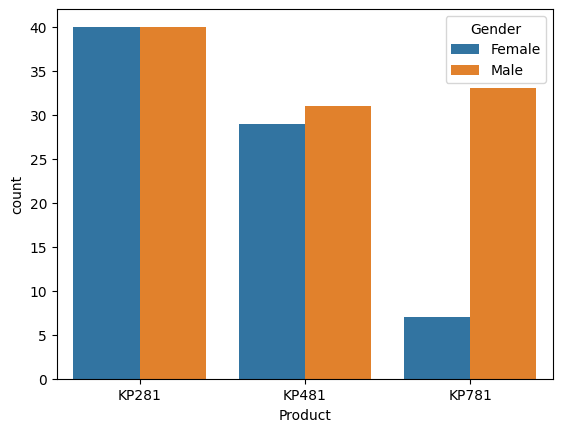

In [101]:
sns.countplot(x='Product', hue='Gender', data=df)

KP281 & KP481 - nearly equal male and female buyers).

KP781 - Strong male dominance.

Insight: Advanced treadmill (KP781) resonates more with male buyers, while entry/mid-level models are gender-neutral.

<Axes: xlabel='Product', ylabel='count'>

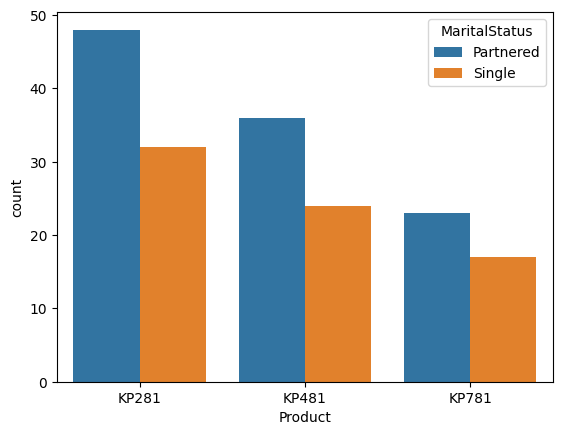

In [102]:
sns.countplot(x='Product', hue='MaritalStatus', data=df)

KP281 - More buyers are partnered.

KP481 - Still majority partnered, but singles also significant.

KP781 - Partnered and single buyers are more balanced.

Insight: Entry-level treadmills appeal to family/partnered households, while KP781 attracts athletes/professionals.

<Axes: >

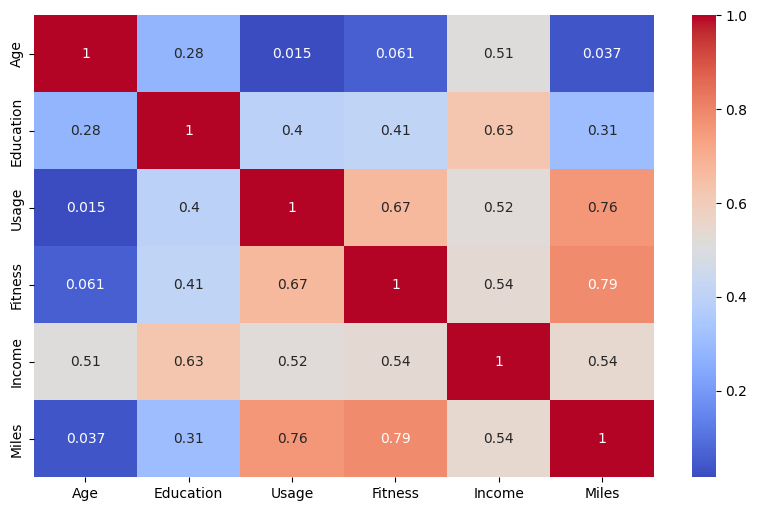

In [103]:
plt.figure(figsize=(10,6))
numeric_df = df.drop(['Product', 'Gender', 'MaritalStatus'], axis=1)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

### Statistics

Marginal probabilities or you can say probability of customer to buy that product in this case

In [104]:
# Marginal probabilities for Product
marginal_prod = df['Product'].value_counts().sort_index()
print("Counts:\n", marginal_prod)

Counts:
 Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


In [105]:
marginal_prod_pct = df['Product'].value_counts(normalize=True).sort_index()
print("Proportions:\n", (marginal_prod_pct*100).round(2).astype(str) + '%')

Proportions:
 Product
KP281    44.44%
KP481    33.33%
KP781    22.22%
Name: proportion, dtype: object


44.44% of customers bought KP281

33.33% bought KP481

22.22% bought KP781

A joint distribution shows the probability of two (or more) random variables happening together.

In this case we have to see if gender and maritalstatus effect out product sales

In [106]:
pd.crosstab(df['Product'], df['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


In [107]:
pd.crosstab(df['Product'], df['Gender'], normalize='all')*100

Gender,Female,Male
Product,,
KP281,22.222222,22.222222
KP481,16.111111,17.222222
KP781,3.888889,18.333333


KP281 & KP481 → almost equal split between male & female → gender-neutral demand.

KP781 → mostly male buyers (18.3% vs 3.9% female) → premium product appeals mainly to men.

In [112]:
cond_prob_product_given_gender = pd.crosstab(df['Product'], df['Gender'], normalize='columns') * 100
print("P(Product | Gender):\n", cond_prob_product_given_gender.round(2).astype(str) + '%')

P(Product | Gender):
 Gender   Female    Male
Product                
KP281    52.63%  38.46%
KP481    38.16%  29.81%
KP781     9.21%  31.73%


KP281 → buyers are equally male & female (50–50).

KP481 → almost balanced (48% Female, 52% Male).

KP781 → heavily male-dominated (83% Male, 17% Female).

# KP281 (Entry-Level)

Younger customers (20–30), lower to mid income (~45k).

Casual usage (70–100 miles/week).

Balanced gender, more partnered households.

Target: Budget-conscious families & new fitness users.

# KP481 (Mid-Level)

Similar age as KP281 (~25–30).

Slightly higher income (~50k).

Moderate mileage (~80–100 miles/week).

Balanced gender & marital status.

Target: Working professionals and consistent fitness users.

# KP781 (Premium)

Slightly older users, higher incomes (~75k+).

Very high mileage (150+ miles/week).

Mostly male customers.

Mix of single and partnered.

Target: Athletes, premium customers, gyms.